<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">


# <center> **15. Search-based planning algorithms** </center>



##  **Outline**
 
1. [**Searching Problems**](#eje1)
2. [**First solution: Breath First Search (BFS)**](#eje2)
3. [**Second solution: Depth First Search (DFS)**](#eje3)


In [1]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20221-H1" #@param {type:"string"}
assignment_id = group_id +'.search_based_alg'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [2]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student')
print(os.getcwd())

In [ ]:
#@title 2. LOAD LIB { display-mode: "form" }

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# **1. Searching Problems** <a name="eje1"></a>

**Como un agente puede encontrar una secuencia de acciones para lograr sus metas**

An agent is anything that can be viewed as perceiving its environment through sensors and SENSOR acting upon that environment through actuators.


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerSP.png" alt="Drawing" style="width:1700px;">


## **1.1. Route finding problem examples**

Airline travel-planning systems, route streams in a computer netwoork, car driving, robot navigation. 

- **States** are locations
- **Initial state** is specified by user's query
- **Actions** advance from current location
- **Goal test** is the final destination
- **Path cost** depends monetary cost, waiting time, distance of path, and so on

## **1.2 Well-defined problems and solutions**

- **Initial state** where the agent start

- Description of possible **actions**. Given a particular state $s$, which particular action $a$ can the agent do. 

- Description of what each action does, this is named **transition model**
  - Result(S, a)-> return a state

- States, actions, and transition model define the **state space** as a graph: nodes are states and links actions. 
- A **path** is a sequence of states connected by actions. 
- The **goal test** determine the final state the will be achieved. 
- A **path cost** function that assigns a numeric cost to each path

## **Especific example: Robot navigation problem**

Solving this problem is important because autonomous robots require the ability to plan its path to reach a goal.

<img src='https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/robot_comic1.png' style="width:350px;">

## **1.3 Noninformed algorithms**

In this lesson we will to study two noninformed different algorithms: **Breath First Search** and **Depth First Search**

***We assume that robot doest not have any artifitial vision sensor. The robot only is able to move in local directions, one position at time, and detect if position is goal or not***

- To start with robot navigation example, we need to create a map and define motions of robot, it is defined as follows: 

In [ ]:
#@title **code** Navigation Map
EMPTY, WALL, TARGET, USED = ".","X","T","o"
c  = pd.Series({"EMPTY": ".", "WALL":"X", "TARGET":"T", "USED":"o"})
ci = pd.Series({".": 0, "X": 255, "T":100, "o":200})

def plot_map(grid,path=[]):
    img = np.r_[[[ci[i] for i in j] for j in grid]]
    #print( "img", type(img), img.shape)
    #print(img)
    plt.imshow(img, alpha=.5)
    if(len(path)>0):
        for i in range(len(path)-1):
            plt.plot([path[i][1],path[i+1][1]],[path[i][0],path[i+1][0]], color="black", lw=4)    
        plt.title("path length = %d"%len(path))
        
    plt.xticks(range(img.shape[1]), range(img.shape[1]))
    plt.yticks(range(img.shape[0]), range(img.shape[0]))

In [ ]:
#@title **code** Motion definition
def possible_moves(grid, y,x):
    moves = [ [y,x+1], [y-1,x], [y,x-1], [y+1,x]]
    
    moves = [(my,mx) for my,mx in moves if mx>=0 and mx<len(grid[0]) and \
                                           my>=0 and my<len(grid) and grid[my][mx]!=c.WALL]    
    return moves

Lets try with an example of grid...

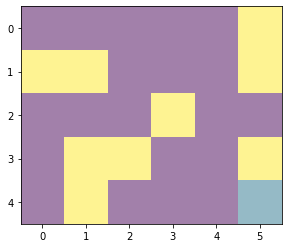

In [ ]:
#@title **code** Run an example
grid = [".....X",
        "XX...X",
        "...X..",
        ".XX..X",
        ".X...T"]

plot_map(grid)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- Try with other map configuration!
- Try to pass some manual path

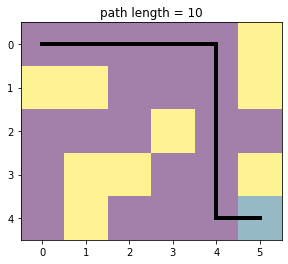

In [ ]:
#@title **code student** one solution





# **2. First solution: Breath First Search (BFS)** <a name="eje2"></a>


This is **breadth first**. 

- We put the initial node into the queue. 
- Then repeat this procedure until visit the goal node or visit all available nodes: 
 - take the first from the queue, 
 - check if it was visited or not, 
 - check if it's the goal, 
 - put all neighbours in the end of the queue, repeat. 

For each step we track not only the nodes, but directions and the path for the current node too.

<img src='https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/robot_1.png' style="width:500px;">
<img src='https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/BFS_tree.png' style="width:700px;">


In [ ]:
#@title **code: Breath First Search (BFS)**
from collections import deque

def bfs_search(grid, verbose=True):
    n_iterations   = 0
    max_queue_len  = 0
    start = (0, 0)
    queue = deque([([], start)]) #deque-> cola doblemente terminada Pilas(LIFO), Colas(FIFO)
    visited = set()
    while queue:
        n_iterations += 1
        max_queue_len = max_queue_len if len(queue) < max_queue_len else len(queue)
        path, (y,x) = queue.popleft()
        #print("***** iterations ***** ", n_iterations)
        #print("path: ", path, (y,x))
    
        if grid[y][x] == c.TARGET:
            if verbose:
                print("n_iterations %d, max_queue_len %d"%(n_iterations, max_queue_len))
            return path+[(y,x)]
        if (y,x) in visited:
            continue          #salta hasta el while
        visited.add((y,x))
        for move in possible_moves(grid,y,x):
            queue.append((path + [(y,x)], move))
            #print("append: ", (path + [(y,x)], move))

    return []

n_iterations 39, max_queue_len 8
success True


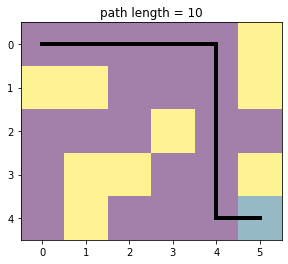

In [ ]:
#@title **code** compute a path with BFS
p=bfs_search(grid)
print("success", len(p)>0)
plot_map(grid, p)

In [ ]:
#@title **code** print path
print(p)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 5)]


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- does it give the best answer?

# **3. Second solution: Depth First Search (DFS)** <a name="eje3"></a>


This is **depth first**. We simply use the other way around.

- Does it give the best answer?
- How is its computational complexity as compared with  BFS?


<img src='https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/robot_bfs.png' style="width:700px;">
<img src='https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/DFS_tree.png' style="width:700px;">

In [ ]:
#@title **code: Depth First Search (DFS)**
from collections import deque

def dfs_search(grid, verbose=True):
    n_iterations   = 0
    max_queue_len  = 0
    start = (0, 0)
    queue = deque([([], start)])
    visited = set()
    while queue:
        n_iterations += 1
        max_queue_len = max_queue_len if len(queue) < max_queue_len else len(queue)
        path, (y,x) = queue.pop()
        if grid[y][x] == c.TARGET:
            if verbose:
                print("n_iterations %d, max_queue_len %d"%(n_iterations, max_queue_len))
            return path+[(y,x)]
        if (y,x) in visited:
            continue
        visited.add((y,x))
        for move in possible_moves(grid,y,x):
            queue.append((path + [(y,x)], move))
    return []

n_iterations 35, max_queue_len 15
success True


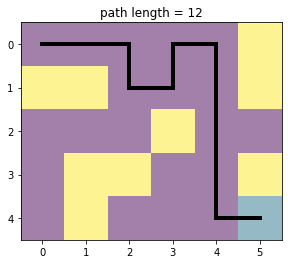

In [ ]:
#@title **code**
p=dfs_search(grid)
print("success", len(p)>0)
plot_map(grid, p)

Genrating more complex grids, by using random maps

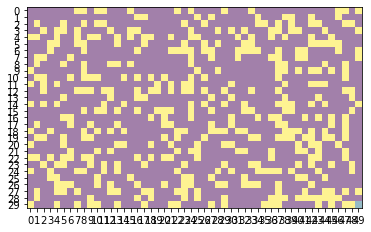

In [ ]:
#@title **code:** random maps
def generate_maze(size):
    grid = (np.random.random(size=size)>.7)*1
    grid = [[c.WALL if grid[x,y] else c.EMPTY for y in range(grid.shape[1])] for x in range(grid.shape[0])]
    grid[-1][-1]=c.TARGET
    return grid
grid = generate_maze(size=(30,50))
plot_map(grid)

[(1, 2), (1, 0), (2, 1)]


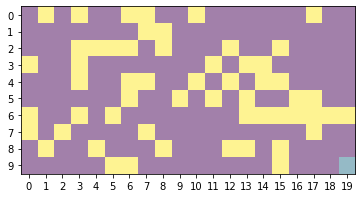

In [ ]:
#@title **code:** grid example
grid = generate_maze(size=(10,20))
plot_map(grid)
print(possible_moves(grid, 1,1))

n_iterations 352, max_queue_len 25
success True
100 loops, best of 3: 6.36 ms per loop


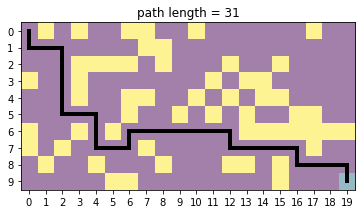

In [ ]:
#@title **code:** bfs_search
p_bfs = bfs_search(grid)
print("success", len(p_bfs)>0)
%timeit bfs_search(grid, verbose=False)
plot_map(grid, p_bfs)

n_iterations 2633, max_queue_len 825
success True
10 loops, best of 3: 57.7 ms per loop


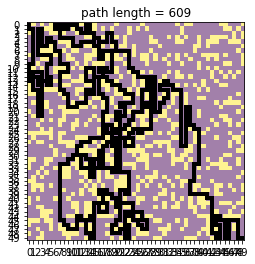

In [ ]:
#@title **code:** dfs_search
p_dfs = dfs_search(grid)
print("success", len(p_dfs)>0)
%timeit dfs_search(grid, verbose=False)
plot_map(grid, p_dfs)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- How to obtain from this answer a more robust solution?

### <span style="color:red">R:/ </span>:  let's shorten the answer of DFS

- is it now the best answer?

In [ ]:
#@title **code student** solution 





<class 'list'>
<class 'numpy.ndarray'> 609


In [ ]:
#@title **code** map solution
plot_map(grid, pp)

observe computing times. larger mazes makes DFS more iterations (but slower due to data structures which should be improved)

In [ ]:
#@title **code** other example
grid = generate_maze(size=(10,20))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print("bfs solution len", len(bfs_search(grid)))
print("dfs solution len", len(dfs_search(grid)))

100 loops, best of 3: 6.85 ms per loop
100 loops, best of 3: 5.2 ms per loop
n_iterations 389, max_queue_len 29
bfs solution len 37
n_iterations 245, max_queue_len 111
dfs solution len 95


In [ ]:
#@title **code** other example
grid = generate_maze(size=(20,30))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print("bfs solution len", len(bfs_search(grid)))
print("dfs solution len", len(dfs_search(grid)))

1000 loops, best of 3: 228 µs per loop
1000 loops, best of 3: 227 µs per loop
bfs solution len 0
dfs solution len 0


In [ ]:
#@title **code** other example
grid = generate_maze(size=(50,50))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print("bfs solution len", len(bfs_search(grid)))
print("dfs solution len", len(dfs_search(grid)))

10 loops, best of 3: 87.7 ms per loop
10 loops, best of 3: 57.6 ms per loop
n_iterations 5018, max_queue_len 125
bfs solution len 99
n_iterations 2633, max_queue_len 825
dfs solution len 609


### _"Although some of these algorithms can solve any solvable problem, none of them can do so efficiently"_

# References

[1] [labyrinth-algorithms](http://bryukh.com/labyrinth-algorithms/).

[2] [GPS example](https://www.hackerearth.com/blog/algorithms/breadth-first-search-bfs-algorithm-example-gps-navigation/)

[3] [Other algorithms](https://www.hackerearth.com/blog/algorithms/creating-first-2d-game-algorithm/)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/robot_comic.png" style="width:300px;">



---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>